Análisis de datos en salud
============================

Unidad 5
-----------------------------------------------------



In [33]:
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especificamos la ruta hasta la carpeta donde tenemos los archivos de la Unidad 5
%cd /content/drive/MyDrive/Colab_Notebooks/Analisis_datos_salud/Unidad5


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks/Analisis_datos_salud/Unidad5


## Dataset de demencia

Los datos de este dataset contiene información de características cerebrales obtenidas a partir de estudios de resonancia magnética estructural (en inglés, *structural magnetic resonance* (sMR)).

Estos datos forman parte del estudio descrito en el artículo:

`Battineni, Gopi; Amenta, Francesco; Chintalapudi, Nalini (2019), “Data for: MACHINE LEARNING IN MEDICINE: CLASSIFICATION AND PREDICTION OF DEMENTIA BY SUPPORT VECTOR MACHINES (SVM)”, Mendeley Data, V1, doi: 10.17632/tsy6rbc5d4.1`


### Demencia

La demencia es un síndrome caracterizado por el deterioro de la función cognitiva más allá de lo que podría esperarse del envejecimiento normal. Afecta la memoria, el pensamiento, la orientación, la comprensión, el cálculo, la capacidad de aprendizaje, el lenguaje y el juicio. El deterioro de la función cognitiva suele ir acompañado y en ocasiones precedido por un deterioro del control emocional, el comportamiento social o la motivación.

La demencia es el resultado de una variedad de enfermedades y lesiones que afectan primaria o secundariamente al cerebro, como la enfermedad de Alzheimer o el accidente cerebrovascular.

La demencia es una de las principales causas de discapacidad y dependencia entre las personas mayores en todo el mundo. Puede resultar abrumador, no sólo para las personas que lo padecen, sino también para sus cuidadores y familiares. A menudo hay una falta de conciencia y comprensión sobre la demencia, lo que genera estigmatización y barreras para el diagnóstico y la atención.

### Dataset

Las características principales del estudio son las siguientes:
- El dataset `dementia_dataset.csv` consta de una colección longitudinal de 150 participantes de entre 60 y 96 años.
- Cada participante fue escaneado en dos o más visitas, separadas por al menos un año para un total de 373 sesiones de imágenes.
- Para cada uno, se incluyen varias exploraciones de resonancia magnética ponderadas en T1 individuales.
- Todos los participantes son diestros e incluyen tanto hombres como mujeres.
- El estudio incluye tanto participantes no dementes como participantes dementes.

### Ejercicio 1

**(1 punto)**

a) Primero de todo vamos a explorar un poco el dataset `dementia_dataset.csv`. Carga los datos y muestra su tamaño y el nombre de las columnas. Muestra también por pantalla las 5 primeras filas. **(0.25 puntos)**

b) ¿Hay algún valor perdido (*missing*) (NaN) o fila duplicada en el dataset? Si los hay, corrígelo de la manera que te parezca más adecuada. **(0.25 puntos)**

c) A continuación contesta las preguntas siguientes **(0.5 puntos)**:

- ¿Cuántos participantes hay?

- ¿Cuántos participantes sanos hay en la 1a exploración? Y participantes con demencia? Y en la última exploración?

- ¿Cuántos participantes han desarrollado demencia durante el transcurso del estudio?

- ¿Cuál es la última visita de los participantes? (e.g. en este estudio, la mayoría de participantes tienen la segunda/tercera exploración como última). Muestra un histograma del número de la última visita

In [34]:
#a)

# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


# Cargamos el archivo csv en un DataFrame
dementia_df = pd.read_csv("data/dementia_dataset.csv", sep=",")

# Mostramos el tamaño del df
print("Tamaño df:\n", dementia_df.shape)

# Mostramos el nombre de las columnas
print("Columnas del df:\n", dementia_df.columns)

# Visualizamos las 5 primeras filas con el comando head()
dementia_df.head()

Tamaño df:
 (373, 15)
Columnas del df:
 Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [35]:
# Mostramos el tipo de las variables
print(dementia_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB
None


In [36]:
#b) Gestión de duplicados y NaNs

#Miramos si hay duplicados
print("Filas duplicadas:", dementia_df.duplicated().sum())

# No hay filas duplicadas!

Filas duplicadas: 0


In [37]:
# Hay valores nulos en el df
dementia_df.isna().sum()

,0
Subject ID,0
MRI ID,0
Group,0
Visit,0
MR Delay,0
M/F,0
Hand,0
Age,0
EDUC,0
SES,19


In [38]:
# Como es un df pequeño, sustituímos por la moda/media
# También se podrían eliminar estos registros

# Sustituímos los NaNs por la moda (valor más frecuente)
dementia_df.SES.fillna(dementia_df.SES.mode()[0], inplace=True)

# Sustituímos los NaNs por la media
dementia_df.MMSE.fillna(dementia_df.MMSE.mean(), inplace=True)

# Ya no hay valores nulos en el df
dementia_df.isna().sum()

,0
Subject ID,0
MRI ID,0
Group,0
Visit,0
MR Delay,0
M/F,0
Hand,0
Age,0
EDUC,0
SES,0


In [39]:
#d)

#¿Cuántos participantes hay?

# Miramos el número de valores únicos de Subject ID
n_participantes = dementia_df['Subject ID'].nunique()

print(f"En el estudio hay {n_participantes} participantes.")

En el estudio hay 150 participantes.


In [40]:
#¿Cuántos participantes sanos hay en la 1a exploración? ¿Y participantes con demencia? ¿Y en la última exploración?

# Seleccionamos la 1a visita
init_df = dementia_df[dementia_df.Visit==1]

# Mostramos el número de participantes por cada grupo
init_df.groupby('Group')['Subject ID'].count()

,Subject ID
Group,
Converted,14
Demented,64
Nondemented,72


In [41]:
# Para seleccionar la última exploración, primero ordenamos los datos por ID y Visita
# De este modo, al detectar los duplicados, podemos especificar que queremos la última exploración
# es decir, la última fila donde aparece ese ID
last_df = dementia_df.sort_values(by=['Subject ID','Visit']).drop_duplicates(subset='Subject ID', keep='last')

# Mostramos el número de participantes por cada grupo
last_df.groupby('Group')['Subject ID'].count()

,Subject ID
Group,
Converted,14
Demented,64
Nondemented,72


In [42]:
# También podemos mirar la última visita global (quinta)

# Seleccionamos la 5a visita
last_df2 = dementia_df[dementia_df.Visit==5]

# Mostramos el número de participantes por cada grupo
last_df2.groupby('Group')['Subject ID'].count()

,Subject ID
Group,
Converted,1
Demented,1
Nondemented,4


In [43]:
# ¿Cuántos participantes han desarrollado demencia durante el transcurso del estudio?

# En el dataset podemos ver directamente el número de pacientes que desarrollan
# demencia a lo largo del estudio, son los participantes del grupo "Converted"

# Miramos el número de valores únicos de Subject ID
n_conv = init_df.loc[init_df.Group=='Converted', 'Subject ID'].nunique()

print(f"En el estudio hay {n_conv} participantes que desarrollan demencia.")

En el estudio hay 14 participantes que desarrollan demencia.


<Axes: >

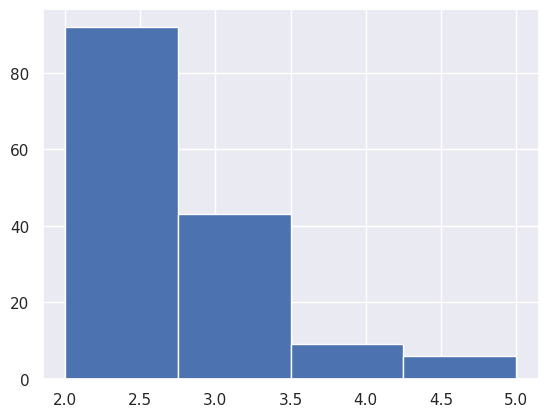

In [44]:
# ¿Cuál es la última visita de los participantes?

# Mostramos un histograma con el número de la última visita
# Podemos ver que la mayoría de participantes tienen entre 2-3 exploraciones

# Usamos la función hist() de pandas
last_df.Visit.hist(bins=4)

### Ejercicio 2

**(1 punto)**


a) Crea un mapa de correlaciones entre les variables relevantes del estudio (cognitivas y estructurales) más la edad, la educación y el status socioeconómico (SES)). ¿Puedes ver correlaciones significativas entre ellas? Muestra el valor de la correlación con dos decimales. **(0.5 puntos)**

b) Centrándonos en la 1a visita, ¿hay diferencias significativas entre los participantes dementes y los no dementes respecto las variables cognitivas? ¿Y en las variables estructurales? Muestra las diferencias gráficamente. **(0.5 puntos)**

**Nota1**: Para este apartado puedes ignorar los participantes "Converted".

c) A continuación queremos estudiar la progresión de la demencia entre la 1a y la 2a visita. Para eso, vamos a calcular una variable delta para cada variable cognitiva y estructural. Esta nueva variable nos dará información sobre el cambio en estas variables entre la 1a y la 2a visita. Crea estas nuevas variables y muestra gráficamente y con estadísticos básicos (media y desviación estándard) las diferencias entre grupos. Explica y interpreta los resultados obtenidos. **Opcional**

**Nota2**: Para este apartado puedes considerar también los participantes "Converted".



<Axes: >

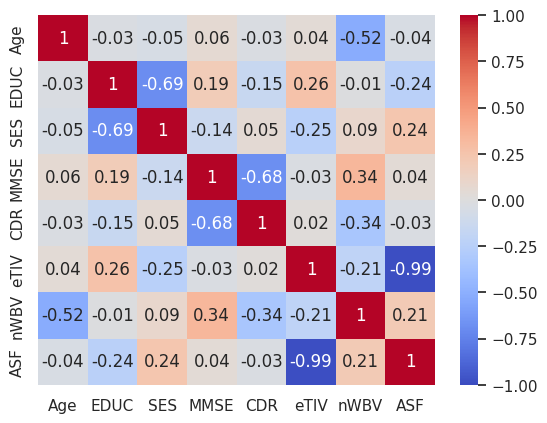

In [45]:
# Apartado a)

# Especificamos las columnas que queremos analizar
cols = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Mostramos la matriz de correlaciones
sns.heatmap(dementia_df[cols].corr(numeric_only=True).round(2), vmin=-1, cmap='coolwarm', annot=True)

# Cabe destacar la correlación negativa entre el ASF y el eTIV.
# También hay una correlación negativa moderada entre el MMSE y el CDR,
# y entre el SES y la educación.

Cabe destacar la correlación negativa moderada entre el MMSE (Mini-Mental State Examination) y el CDR (Clinical Dementia Rating), lo cual es clínicamente coherente: a medida que el grado de demencia (CDR) aumenta, el rendimiento cognitivo general (MMSE) tiende a disminuir.

Por otro lado, también se observa una correlación negativa entre el SES (Socioeconomic Status) y el nivel educativo. Según la literatura, los individuos con menor nivel socioeconómico suelen tener una menor formación académica. Por eso, sería importante verificar cómo están representadas estas variables en el dataset, ya que es posible que valores más bajos de SES indiquen un mayor estatus económico, lo que explicaría la correlación negativa.

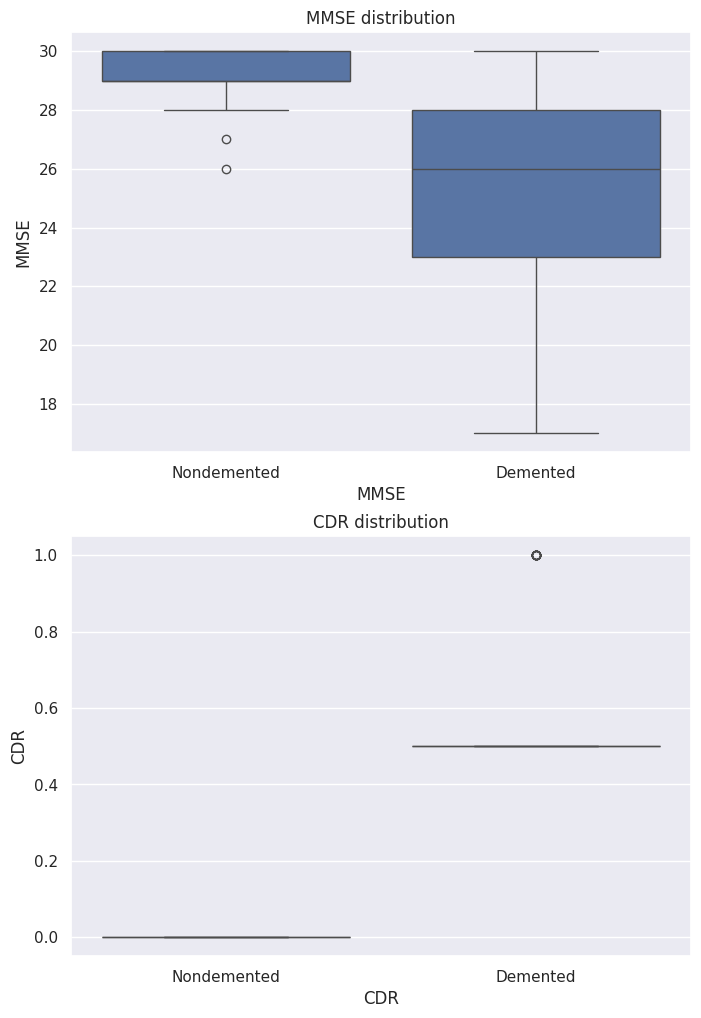

In [46]:
# Apartado b)

# Especificamos las columnas que queremos analizar
cols_demo = ['Age', 'EDUC', 'SES']
cols_cogn = ['MMSE', 'CDR']
cols_struc = ['eTIV', 'nWBV', 'ASF']

init_df2 = init_df[init_df.Group != 'Converted']

### Variables cognitivas

# Definimos el número de filas y columnas para los subplots
num_filas = len(cols_cogn)
num_columnas = 1

# Creamos una nueva figura y ejes para los subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(8, 6*num_filas))

# Iteramos sobre las columnas y crea un subplot para cada una
for i, col in enumerate(cols_cogn):
    # Título del subplot
    axs[i].set_title(f"{col} distribution")
    # Gráfico de barras para la distribución de la columna actual
    sns.boxplot(data = init_df2, x = 'Group', y = col,  ax=axs[i])

    # Etiquetas de los ejes
    axs[i].set_xlabel(f"{col}")

# Muestramos los subplots
plt.show()

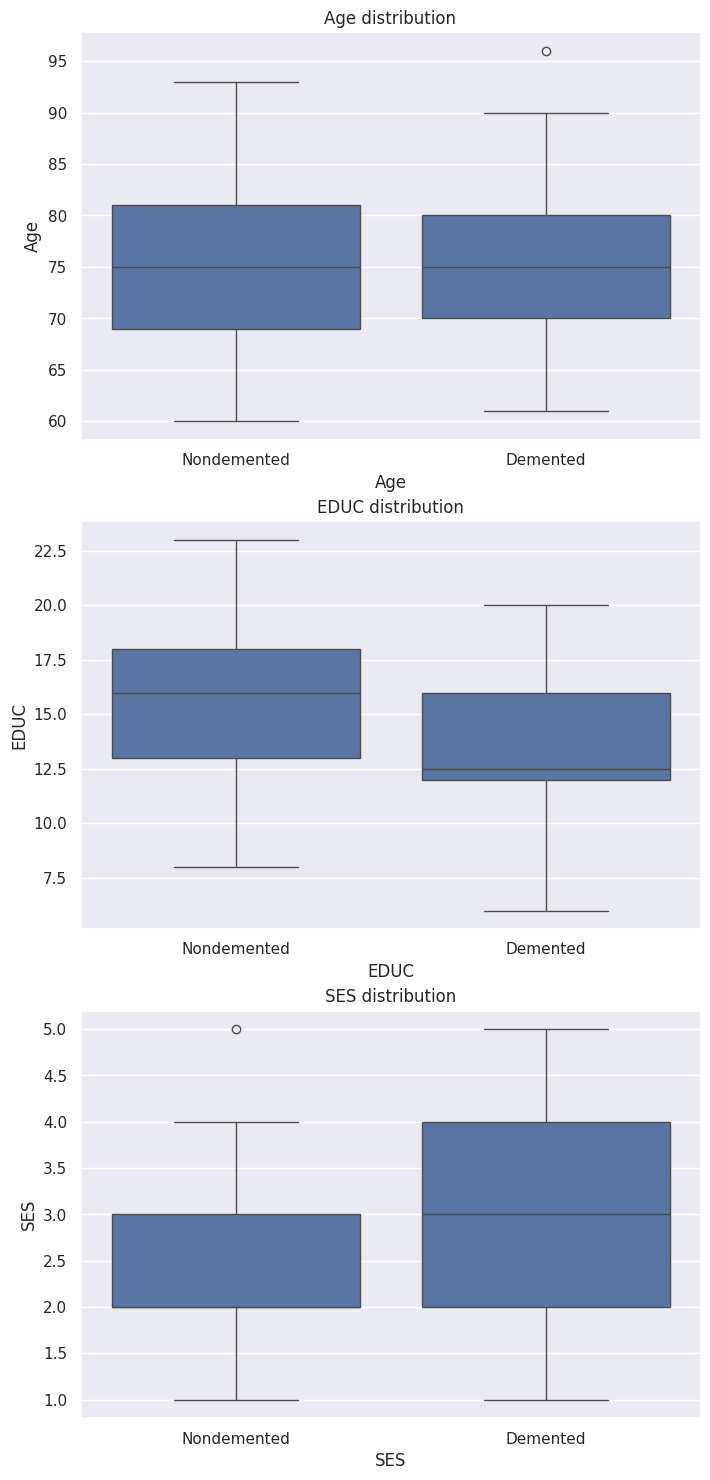

In [47]:
### Variables demográficas

# Definimos el número de filas y columnas para los subplots
num_filas = len(cols_demo)
num_columnas = 1

# Creamos una nueva figura y ejes para los subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(8, 6*num_filas))

# Iteramos sobre las columnas y crea un subplot para cada una
for i, col in enumerate(cols_demo):
    # Título del subplot
    axs[i].set_title(f"{col} distribution")
    # Gráfico de barras para la distribución de la columna actual
    sns.boxplot(data = init_df2, x = 'Group', y = col,  ax=axs[i])

    # Etiquetas de los ejes
    axs[i].set_xlabel(f"{col}")

# Muestramos los subplots
plt.show()

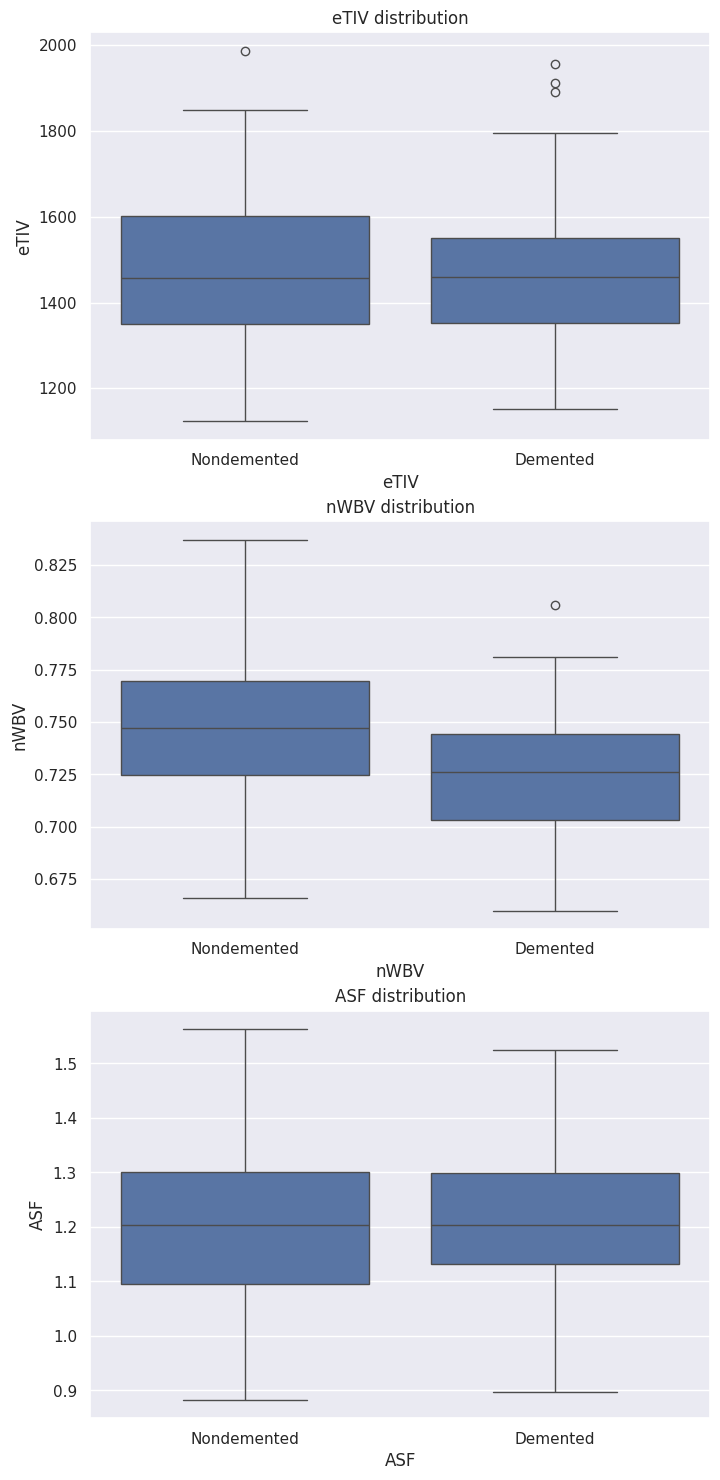

In [48]:
### Variables estructurales

# Definimos el número de filas y columnas para los subplots
num_filas = len(cols_struc)
num_columnas = 1

# Creamos una nueva figura y ejes para los subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(8, 6*num_filas))

# Iteramos sobre las columnas y crea un subplot para cada una
for i, col in enumerate(cols_struc):
    # Título del subplot
    axs[i].set_title(f"{col} distribution")
    # Gráfico de barras para la distribución de la columna actual
    sns.boxplot(data = init_df2, x = 'Group', y = col,  ax=axs[i])

    # Etiquetas de los ejes
    axs[i].set_xlabel(f"{col}")

# Muestramos los subplots
plt.show()

In [49]:
# También podemos calcular las diferencias a través de un test estadístico

# Primero miramos la normalidad de los datos

# Cargamos las librerías necesarias
import scipy.stats as stats

cols_num = cols_struc + cols_cogn

for col in cols_num:
  print(col)
  # Prueba de Shapiro-Wilk
  stat, p_value = stats.shapiro(init_df2[col])

  # Imprimir el resultado
  print(f"Estadístico de prueba: {stat}")
  print(f"P-valor: {p_value}")

  # Interpretar el resultado
  if p_value > 0.05:
      print("Los datos parecen seguir una distribución normal.")
  else:
      print("Los datos no siguen una distribución normal.")

# nWBV y ASF siguen una distribución normal, las otras variables no.

eTIV
Estadístico de prueba: 0.9700766004377034
P-valor: 0.004334242507096528
Los datos no siguen una distribución normal.
nWBV
Estadístico de prueba: 0.9897400027847975
P-valor: 0.41655848271115703
Los datos parecen seguir una distribución normal.
ASF
Estadístico de prueba: 0.9914747199580933
P-valor: 0.5820075883354129
Los datos parecen seguir una distribución normal.
MMSE
Estadístico de prueba: 0.8065166485424013
P-valor: 4.109495062889117e-12
Los datos no siguen una distribución normal.
CDR
Estadístico de prueba: 0.7375077877205447
P-valor: 2.6840201737986376e-14
Los datos no siguen una distribución normal.


In [50]:
# Hacemos un primer análisis inferencial
# Para identificar variables relevantes

# Como la mayoría de los datos no son normales, debemos usar un test no paramétrico
for col in cols_num:
  # Calculamos la U de Mann-Whitney
  grupo1 = init_df2.loc[init_df2['Group']=='Nondemented', col]
  grupo2 = init_df2.loc[init_df2['Group']=='Demented', col]
  t_stat, p_value = stats.mannwhitneyu(grupo1, grupo2)

  # Interpretamos el resultado
  if p_value < 0.05:
      # Imprimimos los resultados
      print(col)
      print(f"T-statistic: {t_stat}")
      print(f"P-value: {p_value}")
      print("Hay una diferencia significativa entre los grupos.")

nWBV
T-statistic: 3080.5
P-value: 0.0007149207638613488
Hay una diferencia significativa entre los grupos.
MMSE
T-statistic: 3976.0
P-value: 9.962665804321837e-14
Hay una diferencia significativa entre los grupos.
CDR
T-statistic: 0.0
P-value: 2.533686840529105e-29
Hay una diferencia significativa entre los grupos.


In [51]:
# Apartado c) - Opcional

# Seleccionamos las exploraciones de la 2a visita
second_df = dementia_df[dementia_df.Visit==2]
# Nos quedamos con las columnas relevantes
second_comp_df = second_df[['Subject ID', 'Group','SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]
# Cambiamos el nombre para poder juntar el df con el df de la visita 1
second_comp_df.columns = ['Subject ID', 'Group', 'SES2', 'MMSE2', 'CDR2', 'eTIV2', 'nWBV2', 'ASF2']

# Nos quedamos con las columnas relevantes
init_comp_df = init_df[['Subject ID', 'Group','SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]
# Cambiamos el nombre para poder juntar el df
init_comp_df.columns = ['Subject ID', 'Group', 'SES1', 'MMSE1', 'CDR1', 'eTIV1', 'nWBV1', 'ASF1']

In [52]:
# Juntamos los dos df y nos quedamos con los registros comunes en ambos (how='inner')
comb1_2_df = init_comp_df.merge(second_comp_df, on=['Subject ID', 'Group'], how='inner')

# Especificamos las columnas de las cuales queremos calcular la columna delta
cols = ['SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# La columna delta será la diferencia entre la 1a y la 2a observación
for col in cols:
  comb1_2_df[f'{col}_delta'] = comb1_2_df[f'{col}1'] - comb1_2_df[f'{col}2']

# Nos quedamos solo con las columnas delta
comb1_2_df = comb1_2_df[['Subject ID', 'Group','SES_delta',
       'MMSE_delta', 'CDR_delta', 'eTIV_delta', 'nWBV_delta', 'ASF_delta']]

In [53]:
cols_delta = ['SES_delta','MMSE_delta', 'CDR_delta',
              'eTIV_delta', 'nWBV_delta', 'ASF_delta']

comb1_2_df.groupby('Group')[cols_delta].agg({'mean', 'std'})

SES_delta      MMSE_delta           CDR_delta            \
                  std mean        std      mean       std      mean   
Group                                                                 
Converted         0.0  0.0   2.103388  1.333333  0.334279 -0.291667   
Demented          0.0  0.0   3.091984  0.929963  0.295949 -0.120968   
Nondemented       0.0  0.0   1.081081  0.071429  0.059761 -0.007143   

            eTIV_delta            nWBV_delta           ASF_delta            
                   std       mean        std      mean       std      mean  
Group                                                                       
Converted    11.372481  -8.333333   0.010886  0.011833  0.009806  0.006167  
Demented     44.865735 -12.983871   0.013528  0.011032  0.034736  0.010226  
Nondemented  25.870341  -5.171429   0.010074  0.007757  0.019832  0.003514

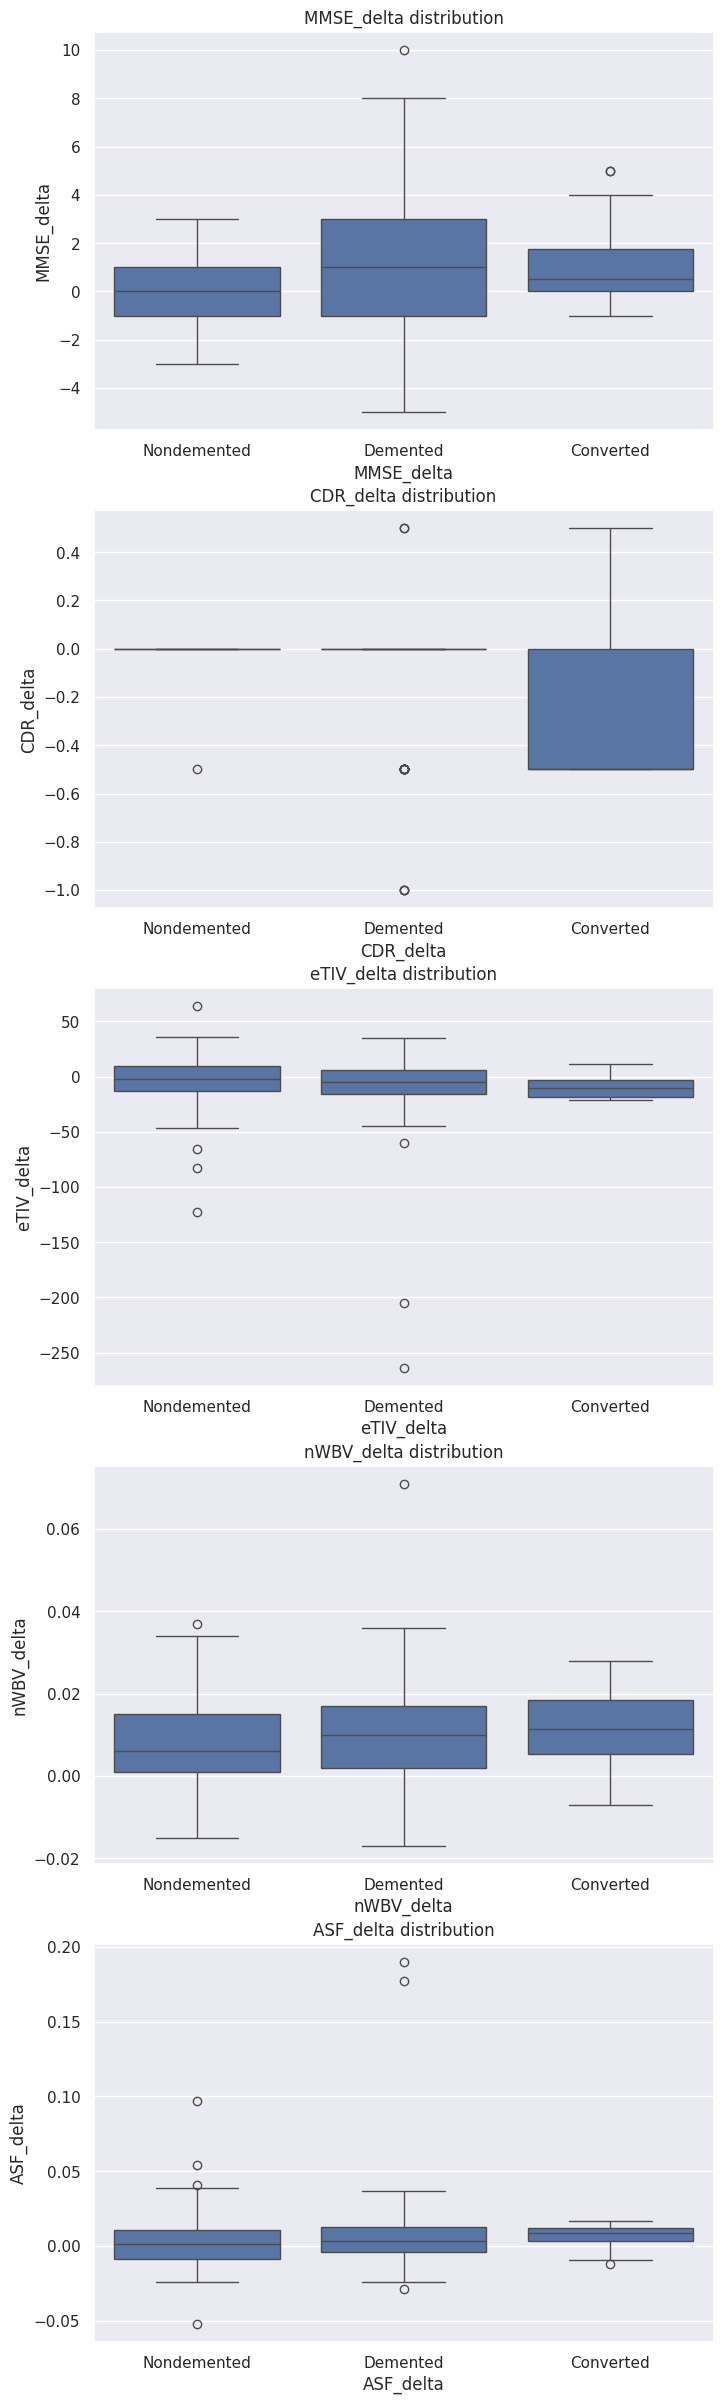

In [54]:
# No hace falta incluir SES porque no hay ninguún cambio
cols_delta = ['MMSE_delta', 'CDR_delta',
              'eTIV_delta', 'nWBV_delta', 'ASF_delta']

# Definimos el número de filas y columnas para los subplots
num_filas = len(cols_delta)
num_columnas = 1

# Creamos una nueva figura y ejes para los subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(8, 6*num_filas))

# Iteramos sobre las columnas y crea un subplot para cada una
for i, col in enumerate(cols_delta):
    # Título del subplot
    axs[i].set_title(f"{col} distribution")
    # Gráfico de barras para la distribución de la columna actual
    sns.boxplot(data = comb1_2_df, x = 'Group', y = col,  ax=axs[i])

    # Etiquetas de los ejes
    axs[i].set_xlabel(f"{col}")

# Muestramos los subplots
plt.show()

### Ejercicio 3

**(2.5 puntos)**

Para finalizar el estudio vamos a crear un modelo de aprendizaje automático supervisado para comprobar si las variables estudiadas son relevantes para diferenciar participantes dementes y no dementes.

a) Primero de todo, selecciona los datos de la **1a visita**. En el caso de los participantes "Converted", en la 1a visita aún eran no dementes, así que vamos a cambiar su grupo a Nondemented. A continuación, codifica esta variable como 0 (Nondemented) y 1 (Demented). **(0.5 puntos)**

b) En este modelo vamos a usar las variables cognitivas y estructurales estudiadas en los apartados anteriores, junto con las variables demográficas (edad, género y educación). Como ya sabes, antes de introducirlas en el modelo, se tienen que transformar (codificar variables categóricas, estandarizar variables numéricas, etc). Aplica las transformaciones que consideres adecuadas. **(0.5 puntos)**

c) Usa el modelo de clasificación que más te guste para clasificar los participantes en dementes o no dementes según sus características. Muestra las métricas de *performance*. ¿Es el modelo bueno para descriminar entre los dos tipos de participantes? ¿Qué variables son más importantes?  **Interpreta y comenta los resultados.** **(1 punto)**

**Nota**: Excluye la variable `CDR`, ya que una escala clínica directamente relacionada con la demencia.

d) Hay modelos, como el Random Forest, que permiten obtener la probabilidad asociada a la predicción mediante la función [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Esta información se puede usar para establecer distintos niveles. En nuestro caso, vamos a usar esta probabilidad para definir 3 niveles de riesgo: riesgo bajo (<0.33), riesgo medio (<0.66) y riesgo alto (>=0.66). ¿Que nivel de riesgo tienen los participantes que luego desarrollaron demencia (Converted)? Interpreta y razona la respuesta. **(0.5 punto)**

In [55]:
#a)

# Creamos un nuevo df con la 1a visita
init_df = dementia_df[dementia_df.Visit==1]
init_model_df = init_df.copy()

# Cambiamos la categoría de los Converted en la 1a visita
init_model_df.loc[init_model_df.Group == 'Converted', 'Group'] = 'Nondemented'

# Comprobamos que solo tenemos 2 grupos ahora
print(init_model_df.Group.unique())

init_model_df['Demented'] = 0
init_model_df.loc[init_model_df.Group == 'Demented', 'Demented'] = 1

# Comprobamos que el cambio es correcto
print(init_model_df[['Group', 'Demented']].drop_duplicates())


['Nondemented' 'Demented']
         Group  Demented
0  Nondemented         0
2     Demented         1


In [56]:
init_model_df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Demented
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,0
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046,1
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444,0
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039,0
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,2.0,28.0,0.5,1357,0.748,1.293,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,OAS2_0182,OAS2_0182_MR1,Demented,1,0,M,R,73,12,2.0,23.0,0.5,1661,0.698,1.056,1
361,OAS2_0183,OAS2_0183_MR1,Nondemented,1,0,F,R,66,13,2.0,30.0,0.0,1495,0.746,1.174,0
365,OAS2_0184,OAS2_0184_MR1,Demented,1,0,F,R,72,16,3.0,24.0,0.5,1354,0.733,1.296,1
367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030,1


In [57]:
#b) Transformación/Escalado variables

# Transformamos la columna M/F a binaria
init_model_df['Gender'] = 0
init_model_df.loc[init_model_df.Group == 'F', 'Gender'] = 1

# Las otras variables las podemos considerar numéricas,
# aunque algunas (como CDR o SES) se podrían considerar categóricas también

cols_num = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Tenemos que escalar las variables para aplicar los modelos
# Cargamos la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Creamos una instancia de StandardScaler
scaler = StandardScaler()

# Aplicamos el escalado estándar solo a las columnas numéricas
init_model_df[cols_num] = scaler.fit_transform(init_model_df[cols_num])

# Comprobamos que las variables se han transformado correctamente
init_model_df.describe()

# ¡Ya tenemos las variables preparadas!

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Demented,Gender
count,150.0,150.0,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000,150.0
mean,1.0,0.0,-8.052818e-16,8.881784e-17,-9.473903e-17,4.144833e-16,-4.440892e-17,-3.878379e-16,-7.993606e-16,5.136632e-16,0.426667,0.0
std,0.0,0.0,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.496250,0.0
min,1.0,0.0,-2.054016e+00,-2.978355e+00,-1.333946e+00,-3.569306e+00,-7.995901e-01,-2.018526e+00,-2.093574e+00,-2.353155e+00,0.000000,0.0
25%,1.0,0.0,-7.242689e-01,-8.841993e-01,-4.244373e-01,-5.272839e-01,-7.995901e-01,-7.304779e-01,-7.175503e-01,-6.210390e-01,0.000000,0.0
50%,1.0,0.0,-5.939537e-02,-1.861472e-01,-4.244373e-01,4.867236e-01,-7.995901e-01,-1.201987e-01,-2.953863e-02,8.490767e-03,0.000000,0.0
75%,1.0,0.0,6.054781e-01,5.119048e-01,4.850713e-01,8.247260e-01,7.380831e-01,5.216715e-01,5.965520e-01,7.017012e-01,1.000000,0.0
max,1.0,0.0,2.733073e+00,2.955087e+00,2.304088e+00,8.247260e-01,2.275756e+00,2.944121e+00,2.777549e+00,2.595749e+00,1.000000,0.0


In [58]:
#c) Modelo: Random Forest

# Cargamos las funciones necesarias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# La columna Demented es nuestra variable a predecir
y = init_model_df.Demented

# Especificamos y seleccionamos las variables que vamos a usar en el modelo
cols = ['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'Gender']
X = init_model_df[cols]

# Separamos el dataset en conjunto de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializamos el modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Entrenamos el modelo con el conjunto de train
model.fit(X_train, y_train)

# Hacemos las predicciones en el conjunto de test
y_pred = model.predict(X_test)

Accuracy: 0.8
Precision: 0.5714285714285714
Recall: 1.0
F1 Score: 0.7272727272727273
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        22
           1       0.57      1.00      0.73         8

    accuracy                           0.80        30
   macro avg       0.79      0.86      0.78        30
weighted avg       0.89      0.80      0.81        30



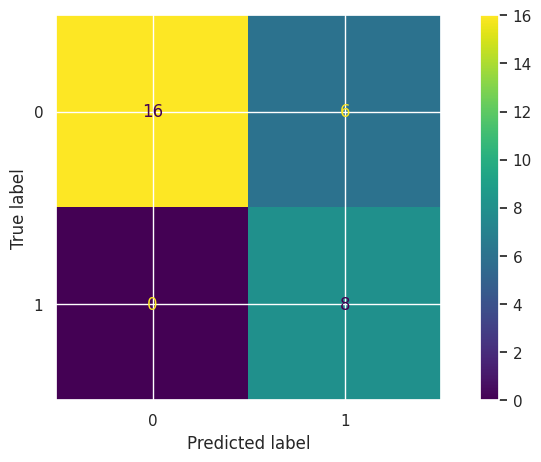

In [59]:
# Mostramos las métricas de performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred) )

# Informe general
print(classification_report(y_test, y_pred))

# Calculamos la matriz de confusión en el conjunto de test
cm = confusion_matrix(y_test,model.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
fig , ax = plt.subplots(figsize=(10,5))
cm_display.plot(ax=ax)
plt.show()


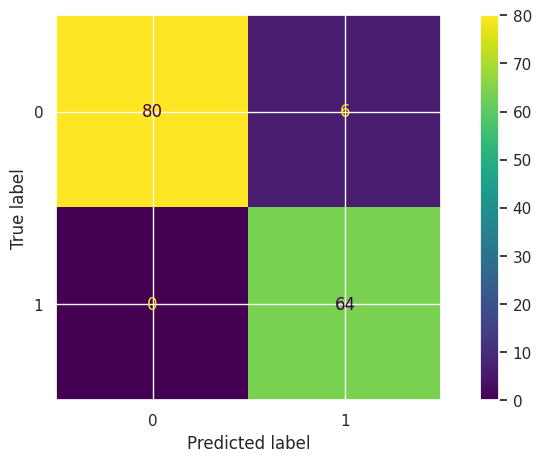

In [60]:
# Calculamos la matriz de confusión en todo el conjunto
cm = confusion_matrix(y,model.predict(X))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
fig , ax = plt.subplots(figsize=(10,5))
cm_display.plot(ax=ax)
plt.show()

Text(0.5, 1.0, 'Importancia de las variables del modelo')

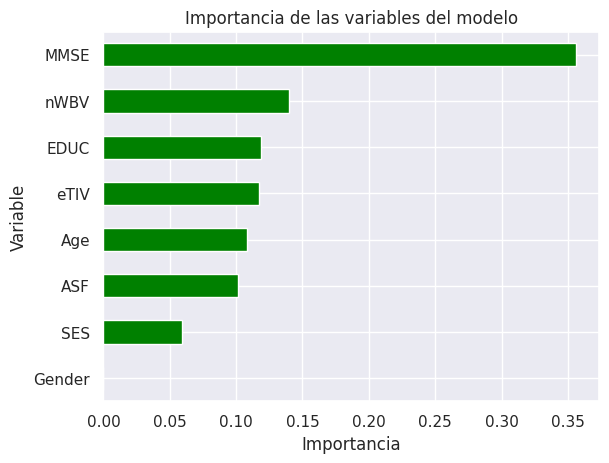

In [61]:
# Mostramos la importancia de las variables en el modelo
global_importances = pd.Series(model.feature_importances_, index=cols)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de las variables del modelo")

El modelo obtiene una accuracy del 80% y un recall del 100%, lo que indica que identifica correctamente todos los casos de pacientes con demencia (no hay falsos negativos), lo cual es muy importante en contextos clínicos, donde el objetivo es no dejar pasar ningún caso.

Sin embargo, la precisión es baja (57%), lo que sugiere que hay varios falsos positivos, es decir, personas sin demencia que el modelo clasifica incorrectamente como dementes. Esto puede llevar a evaluaciones innecesarias, aunque desde un punto de vista clínico, es preferible detectar a alguien como posible paciente y descartarlo en etapas posteriores, que no identificar a un paciente real.

El MMSE es la variable más importante del modelo, lo cual tiene sentido, ya que es un test directamente diseñado para evaluar el deterioro cognitivo. A continuación destacan otras variables estructurales como nWBV y eTIV, así como variables sociodemográficas como EDUC y SES. En cambio, el género no parece tener impacto en el modelo.

In [62]:
# d) Calcular riesgo de padecer demencia

# Con la función predict_proba obtenemos la probabilidad de cada clase
# En este caso queremos la probabilidad de ser demente, por lo tanto, la 2a columna
probability_demented = model.predict_proba(X)[:, 1]

# Ahora vamos a añadir esta información en el df init_df original
# donde tenemos especificados los Converted
init_df['Demented_prob'] = probability_demented

# Ahora vamos a crear las categorías de riesgo con los límites especificados
# Inicializamos todo como High
init_df['Demented_Risk'] = 'Alto'
# Ponemos las condiciones para las otras 2 categorias
init_df.loc[init_df.Demented_prob < 0.33, 'Demented_Risk'] = 'Bajo'
init_df.loc[(init_df.Demented_prob >= 0.33)&(init_df.Demented_prob < 0.66), 'Demented_Risk'] = 'Medio'

In [63]:
# Mostramos los resultados por grupo
init_df.groupby(['Group','Demented_Risk'])['Subject ID'].count().reset_index()

,Group,Demented_Risk,Subject ID
0,Converted,Alto,1
1,Converted,Bajo,11
2,Converted,Medio,2
3,Demented,Alto,62
4,Demented,Medio,2
5,Nondemented,Alto,3
6,Nondemented,Bajo,63
7,Nondemented,Medio,6


Si nos fijamos en el riesgo asignado a los pacientes del grupo Converted en la primera visita, observamos que el modelo los ha clasificado mayoritariamente con riesgo bajo o medio. Esto sugiere que en esa etapa inicial aún no presentaban características clínicas claras de deterioro cognitivo. Sin embargo, en visitas posteriores, estos pacientes mostraron un empeoramiento rápido que los llevó a desarrollar demencia. Por lo tanto, podemos concluir que el modelo no tiene capacidad predictiva suficiente para identificar, desde la primera visita, a aquellos individuos que desarrollarán demencia en el futuro.